## Milestone Project Day 8
###### Author: Bruno Velloso

## Day 4 Questions (1-5)

Import Packages

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

Read CSV data

In [180]:
maindata = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv")

###### Question 1. Number of unique company names

In [181]:
#Q1
numcomps = maindata[["Company Name"]].sort_index().groupby(["Company Name"]).head(1).shape[0]
numcomps #787 different company names

787

###### Question 2. Number of jobs created in queens over all years combined

In [182]:
#Q2
#check for alternate spellings
boroughs = maindata[["Borough"]].sort_index().groupby(["Borough"]).head(1)
#change data type of jobs created
maindata["Job created"]=maindata["Job created"].astype(str)
maindata["Job created"]=maindata["Job created"].str.replace(',', '').astype(float)
numjobqueen = int(maindata.loc[maindata["Borough"]=="QUEENS",["Job created"]].dropna().sum())
numjobqueen # 1196 jobs created

1196

###### Question 3. Number of unique company domain names
NOTE: here there was no "@" I ignored the emails entirely.

In [183]:
#Q3
#change data type of to strings for email
maindata["company email"]=maindata["company email"].astype(str)
#split by "@" sign, make it all lower case
maindata["domain name"] = maindata["company email"].str.split('@').str.get(1).str.lower()
numdomains = maindata[["domain name"]].sort_index().groupby(["domain name"]).head(1).shape[0]
numdomains #588 unique domain names

588

###### Question 4. Average total savings and the total jobs created for each NTA >=5 companies
NOTE: I thought this was unclear. I first filted for NTAs with only >=5 companies. Then, for each of these NTAs I summed the "Total Savings" and "Job created". My final answer was to take the average of each of these objects over all NTAs with >5 companies, which is what I put in as my final answer.

In [184]:
#Q4
maindata["Neighborhood Tabulation Area (NTA) (2020)"]=maindata["Neighborhood Tabulation Area (NTA) (2020)"].astype(str)
maindata["Total Savings"]=maindata["Total Savings"].astype(str)
maindata["Total Savings"]=maindata["Total Savings"].str.replace(',', '').astype(float)
maindata["Job created"]=maindata["Job created"].astype(str)
maindata["Job created"]=maindata["Job created"].str.replace(',', '').astype(float)
maindata["Neighborhood Tabulation Area (NTA) (2020)"]=maindata["Neighborhood Tabulation Area (NTA) (2020)"].astype(str)
busbyNTA = maindata.sort_index().groupby(["Company Name","Neighborhood Tabulation Area (NTA) (2020)"],as_index = False).apply(lambda x: 1)
busbyNTA = busbyNTA.groupby(["Neighborhood Tabulation Area (NTA) (2020)"],as_index = False).count()
#rename column
busbyNTA = busbyNTA.rename(
    columns={
        None: "Count"
    })
#merge in the count by NTA
maindata = pd.merge(maindata, busbyNTA,how='left', left_on='Neighborhood Tabulation Area (NTA) (2020)', right_on='Neighborhood Tabulation Area (NTA) (2020)')
BigNTA = maindata.loc[(maindata["Count"]>=5)&(maindata["Neighborhood Tabulation Area (NTA) (2020)"]!="nan")]
#sum all savings ajnd jobs created over all periods for all these NTAs
totsavandjobbyNTA = BigNTA.groupby(["Neighborhood Tabulation Area (NTA) (2020)"]).sum(numeric_only = True)
totsavandjobbyNTA = totsavandjobbyNTA[["Total Savings","Job created"]]
avgsav = totsavandjobbyNTA["Total Savings"].mean()
avgsav # 1816344.96 savings
avgjobscreated = totsavandjobbyNTA["Job created"].mean()
avgjobscreated #67.56 jobs per NTA
print("For NTAs with at least five listed companies, the average total savings per NTA is %.1f and and the average number of jobs created is %.1f" % (avgsav,avgjobscreated))                                                                                                                                                                                                                                                                                                  

For NTAs with at least five listed companies, the average total savings per NTA is 1618669.9 and and the average number of jobs created is 61.7


###### Question 5. Create dataframe of answers and save to csv

In [185]:
##Q5 put it all in a dataframe and the eexport to csv
df = pd.DataFrame({'Question': ["Q1","Q2","Q3","Q4a","Q4b"],
                   'Description': ["No. of Companies","No. of Queens Jobs Created","No. of Unique Domains","Avg Tot Savings per NTA >5","Avg Tot Jobs Created pre NTA >5"],
                   'Answer': [numcomps, numjobqueen, numdomains,avgsav, avgjobscreated]})
print(df)###### Question 1. Number of unique company names

  Question                      Description        Answer
0       Q1                 No. of Companies  7.870000e+02
1       Q2       No. of Queens Jobs Created  1.196000e+03
2       Q3            No. of Unique Domains  5.880000e+02
3      Q4a       Avg Tot Savings per NTA >5  1.618670e+06
4      Q4b  Avg Tot Jobs Created pre NTA >5  6.167742e+01


In [186]:
#Q5. Export to csv
df.to_csv("pandasexanswers.csv", index = False)

## Day 5 Questions (1a-1c)

In [187]:
%matplotlib inline

###### Question 1a. Scatter plot of jobs created vs total savings (by company-year observation)
NOTE: I took each point to ba the value for a specific company in a specific year. I took "average" savings to be the "Total Savings" because it was unclear what we were supposed to "average" over. I exclude all negative and 0 values for log(Total Savings). 

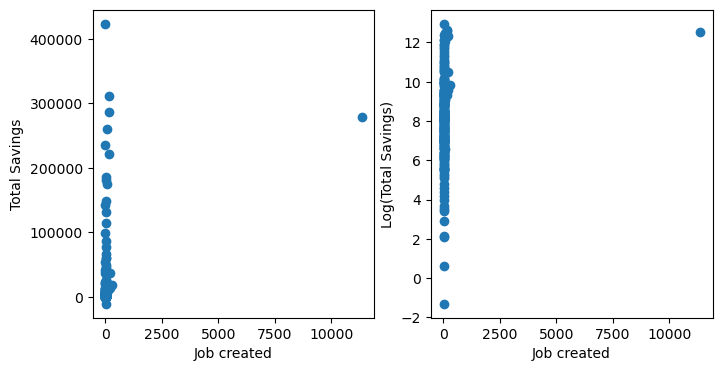

In [188]:
###Q1a
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

#create data
y1 = maindata['Total Savings']
y2 = np.log(maindata['Total Savings'])
x = maindata['Job created']
#plot side by side data
ax1.scatter(x, y1)
ax1.set_xlabel('Job created')
ax1.set_ylabel('Total Savings')

ax2.scatter(x, y2)
ax2.set_xlabel('Job created')
ax2.set_ylabel('Log(Total Savings)')
#show plot
plt.show()

I noticed there was one very large outlier, so in code chunk below I excluded that from the charts, but made the same charts as above otherwise.

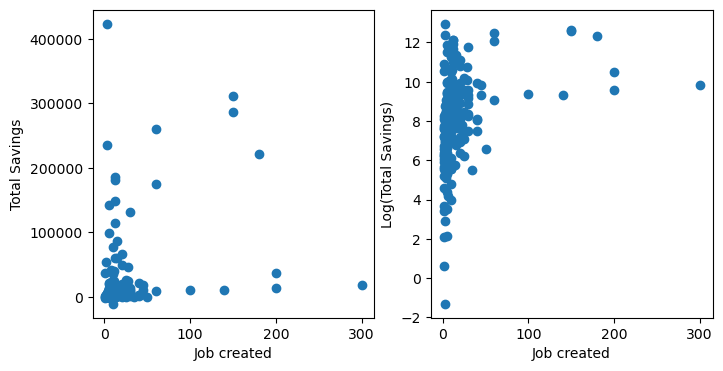

In [189]:
#remove outlier (assume log(0) is removed as well)
newdata = maindata[maindata['Job created']<=10000]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
y1 = newdata['Total Savings']
y2 = np.log(newdata['Total Savings'])
x = newdata['Job created']

ax1.scatter(x, y1)
ax1.set_xlabel('Job created')
ax1.set_ylabel('Total Savings')

ax2.scatter(x, y2)
ax2.set_xlabel('Job created')
ax2.set_ylabel('Log(Total Savings)')

plt.show()

###### Question 1b. Histogram of the log of total savings

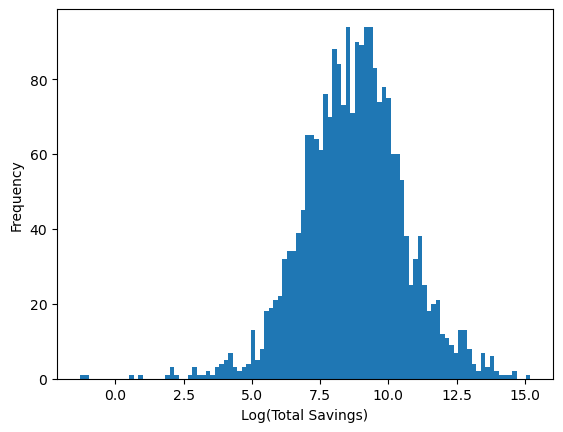

In [190]:
###Q1b histogram
y3 = np.log(maindata['Total Savings'])
y3 = y3.replace([np.inf, -np.inf], np.nan).dropna()
plt.hist(y3, bins=100)

# Set labels for the axes
plt.xlabel('Log(Total Savings)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

###### Question 1c. Line plot of the total jobs created in each year
NOTE: I could not find any month function, so I just summed by year

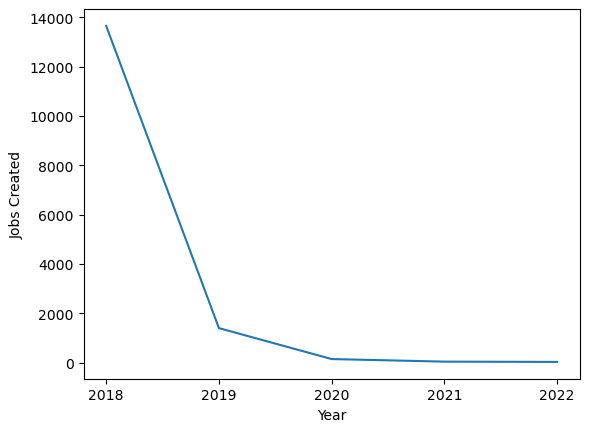

In [191]:
###Q1c Total jobs created per year (since the data does not contain months)
maindata["year"]=maindata["Period"].astype(str).str.replace('FY', '').astype(int)
linpldata = maindata.groupby(["year"],as_index=False).sum()
years = linpldata["year"].astype(int)
jobs_created = linpldata["Job created"]
plt.plot(years, jobs_created)

# Set labels for the axes
plt.xlabel('Year')
plt.ylabel('Jobs Created')
plt.xticks(years, map(int, years))
# Show the plot
plt.show()